<a href="https://colab.research.google.com/github/Robacru/Desafio_data_science2_TelecomX_R_Baez/blob/main/TelecomX_LATAM__R_Baez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Descripción de las columnas y/o datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# llevamos a una variable la lista de las columnas
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#🔧 Transformación

In [ ]:
# separamos los diccionarios en columnas nuevas
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
nternet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])


In [ ]:
# combinar todo en un solo DataFrame
datos_abiertos = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, nternet_df, account_df], axis=1)
datos_abiertos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
datos_abiertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


**Para comenzar siempre hay que realizar estos procesos más comunes**
- Datos duplicados
- Valores vacíos
- Valores nulos
- Tipos de datos
- Valores atípicos
- Consistencia y validez de datos categóricos
- Normalización de textos

In [ ]:
# para saber qué datos se han almacenado en las columnnas
# y que muestre menos de 50 si los datos almacenados son muchos
# separando cada resultado de la columna con una línea de 50 '-'
for col in datos_abiertos.columns:
  print(f"valores únicos en la columna'{col}': {datos_abiertos[col].nunique()}")
  if datos_abiertos [col].nunique() < 50:
    print(datos_abiertos[col].unique())
    print('-' * 50)

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'tenure': 73
valores únicos en la columna'PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'InternetService': 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores único

In [ ]:
# verificar datos duplicados
duplicados = datos_abiertos.duplicated().sum()
print(f"Número de líneas duplicadas: {duplicados}")

Número de líneas duplicadas: 0


In [ ]:
# verificar datos nulos
valores_nulos = datos_abiertos.isnull().values.sum()
print("Valores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

Valores nulos por columna:
[]


In [ ]:
# vemos los valores en blanco o vacíos
valores_blco_o_vacio = datos_abiertos.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o vacíos por columna: ")
print(valores_blco_o_vacio[valores_blco_o_vacio > 0])


Valores en blanco o vacíos por columna: 
Churn            224
Charges.Total     11
dtype: int64


In [ ]:
# verificamos los datos que están vacíos en "Churn"
datos_abiertos[datos_abiertos['Churn'].str.strip() == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [ ]:
# verificamos los datos que están vacíos del total gastado por el cliente
datos_abiertos[datos_abiertos['Charges.Total'].str.strip() == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
# reemplazamos los datos que estaban vacíos con "NaN" (Not a Number)
datos_abiertos['Charges.Total'] = datos_abiertos['Charges.Total'].replace(['', ' '], 0)

In [ ]:
datos_abiertos['Charges.Total'].apply(type).value_counts()

,count
Charges.Total,
<class 'str'>,7256
<class 'int'>,11


In [ ]:
# el cambio no sirvió porque la columna aún sigue siendo "object" o sea una string
datos_abiertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# con esto arreglamos los datos para que se lean como número
datos_abiertos['Charges.Total'] = pd.to_numeric(datos_abiertos['Charges.Total'], errors='coerce')

In [ ]:
datos_abiertos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
datos_abiertos.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


In [ ]:
# transformamos la columna Churn en No = 0, Yes = 1, vacío = 1
# aplicaremos 1 a los registros vacíos, ya que se consultó a los Jefes del Proyecto y se detectó que "por alguna razón"
# aparecieron clientes con Churn = vacío, siendo que aún están activos

datos_abiertos['Churn'] = datos_abiertos['Churn'].replace({'Yes': 1, 'No': 0, '': 1}).infer_objects(copy = False).astype('Int64')

In [ ]:
# verifiquemos que los cambios se hayan realizado en la columna "Churn"
print(f"Valores únicos en la columna 'Churn': {datos_abiertos['Churn'].nunique()}")
print(datos_abiertos['Churn'].unique())

Valores únicos en la columna 'Churn': 2
<IntegerArray>
[0, 1]
Length: 2, dtype: Int64


In [ ]:
# Crear la columna Cuentas_Diarias

datos_abiertos['Cuentas_Diarias'] = datos_abiertos['Charges.Monthly'] / 30
print(datos_abiertos[['Charges.Monthly', 'Cuentas_Diarias']])

      Charges.Monthly  Cuentas_Diarias
0               65.60         2.186667
1               59.90         1.996667
2               73.90         2.463333
3               98.00         3.266667
4               83.90         2.796667
...               ...              ...
7262            55.15         1.838333
7263            85.10         2.836667
7264            50.30         1.676667
7265            67.85         2.261667
7266            59.00         1.966667

[7267 rows x 2 columns]


In [ ]:
datos_abiertos = datos_abiertos.drop('Cuentas_Diarias', errors = 'ignore')
datos_abiertos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


---
---

#📊 Carga y análisis

In [ ]:
import matplotlib.pyplot as plt

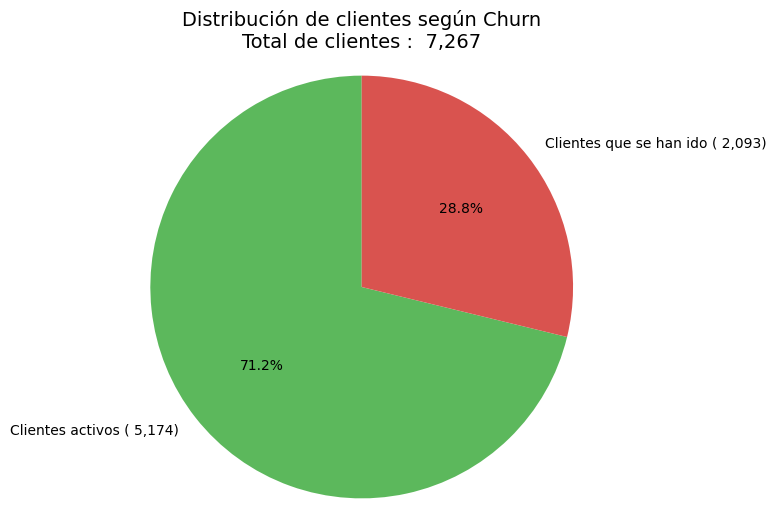

In [ ]:
# Gráfico para ver el los clientes que se han ido vs los que se han quedado
churn_total = datos_abiertos['Churn'].value_counts()
total_clientes = len(datos_abiertos)
labels = [f'Clientes activos ({churn_total[0]: ,})', f'Clientes que se han ido ({churn_total[1]: ,})']
colors = ['#5cb85c', '#d9534f']
plt.figure(figsize = (6, 6))
plt.pie(churn_total, labels = labels, autopct = '%1.1f%%', startangle = 90, colors = colors)
titulo = f'Distribución de clientes según Churn\nTotal de clientes : {total_clientes: ,}'
plt.title(titulo, fontsize = 14)
plt.axis('equal')
plt.show()

In [ ]:
import seaborn as sns

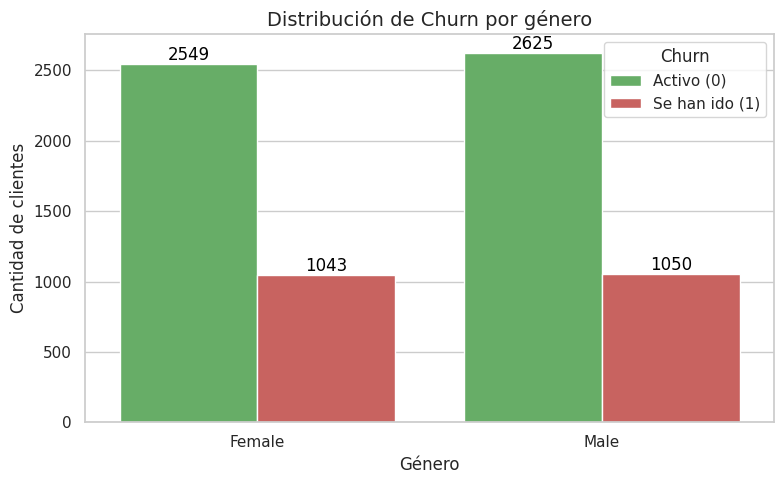

In [ ]:
# El gráfico por género

sns.set(style = "whitegrid")
plt.figure(figsize = (8, 5))
grafico = sns.countplot(
    data = datos_abiertos,
    x = 'gender',
    hue = 'Churn',
    palette = ['#5cb85c', '#d9534f']
    )

plt.title('Distribución de Churn por género', fontsize = 14)
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title = 'Churn', labels = ['Activo (0)', 'Se han ido (1)'])
plt.tight_layout()

for barra in grafico.patches:
  altura = barra.get_height()
  if altura > 0:
    grafico.annotate(
        f'{int(altura)}',
        (barra.get_x() + barra.get_width() / 2, altura),
        ha = 'center',
        va = 'bottom',
        fontsize = 12,
        color = 'black'
    )

plt.show()

In [ ]:
import plotly.express as px

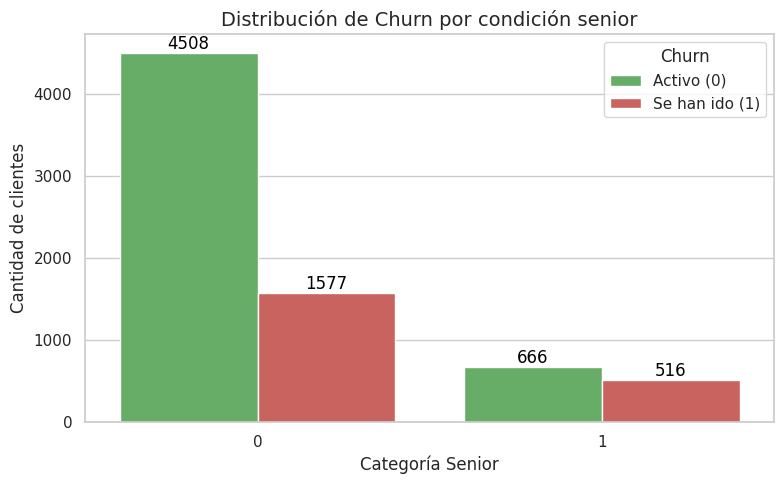

In [ ]:
# gráfico de análisis por condición senior

sns.set(style = "whitegrid")
plt.figure(figsize = (8, 5))
grafico = sns.countplot(
    data = datos_abiertos,
    x = 'SeniorCitizen',
    hue = 'Churn',
    palette = ['#5cb85c', '#d9534f']
    )

plt.title('Distribución de Churn por condición senior', fontsize = 14)
plt.xlabel('Categoría Senior')
plt.ylabel('Cantidad de clientes')
plt.legend(title = 'Churn', labels = ['Activo (0)', 'Se han ido (1)'])
plt.tight_layout()

for barra in grafico.patches:
  altura = barra.get_height()
  if altura > 0:
    grafico.annotate(
        f'{int(altura)}',
        (barra.get_x() + barra.get_width() / 2, altura),
        ha = 'center',
        va = 'bottom',
        fontsize = 12,
        color = 'black'
    )

plt.show()

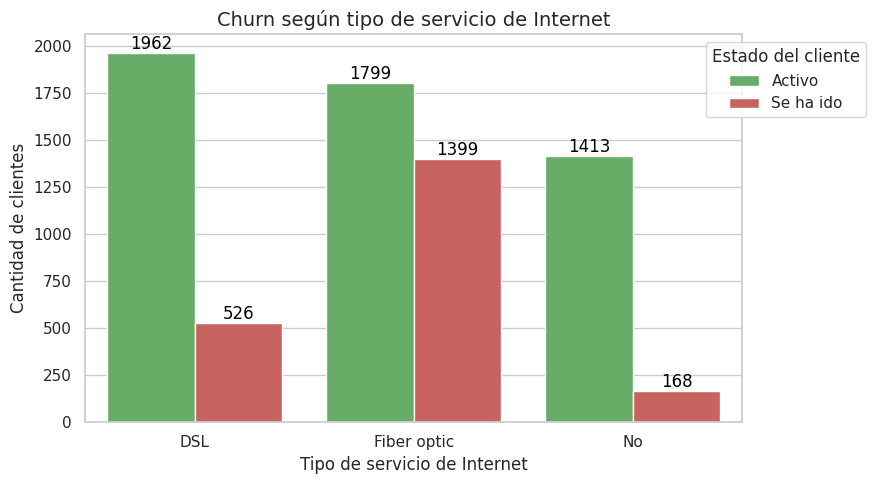

In [ ]:
# gráfico del tipo de conexión a Internet

datos_abiertos['Churn_str'] = datos_abiertos['Churn'].map({0: 'Activo', 1: 'Se ha ido'})

plt.figure(figsize = (9,5))

grafico = sns.countplot(
    data=datos_abiertos,
    x='InternetService',
    hue='Churn_str',
    palette=['#5cb85c', '#d9534f'],
)

plt.title('Churn según tipo de servicio de Internet', fontsize = 14)
plt.xlabel('Tipo de servicio de Internet')
plt.ylabel('Cantidad de clientes')
plt.legend(title = 'Estado del cliente', loc = 'upper right', bbox_to_anchor = (1.2, 1))
plt.tight_layout()

for barra in grafico.patches:
  altura = barra.get_height()
  if altura > 0:
    grafico.annotate(
        f'{int(altura)}',
        (barra.get_x() + barra.get_width() / 2, altura),
        ha = 'center',
        va = 'bottom',
        fontsize = 12,
        color = 'black'
    )

plt.show()

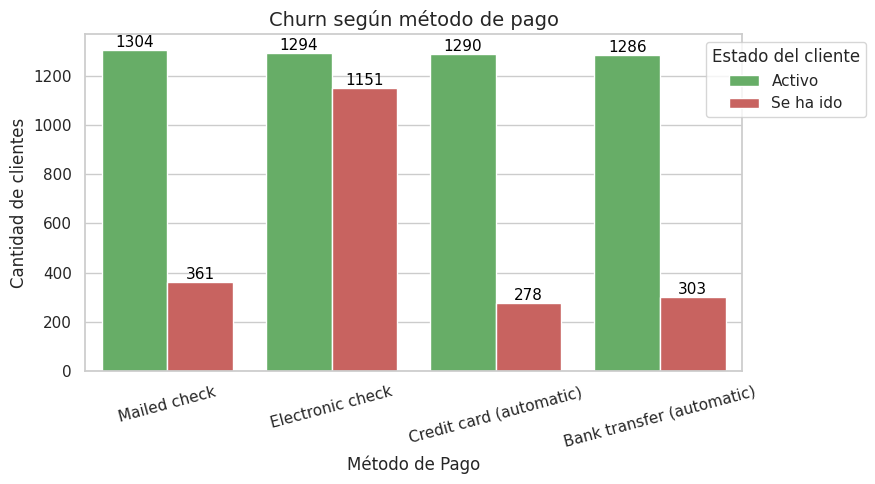

In [ ]:
# gráfico para ver qué pasa con el método de pago

datos_abiertos['Churn_str'] = datos_abiertos['Churn'].map({0: 'Activo', 1: 'Se ha ido'})

plt.figure(figsize = (9, 5))

grafico = sns.countplot(
    data=datos_abiertos,
    x='PaymentMethod',
    hue='Churn_str',
    palette=['#5cb85c', '#d9534f']
)

plt.title('Churn según método de pago', fontsize = 14)
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation = 15)
plt.legend(title = 'Estado del cliente', loc = 'upper right', bbox_to_anchor = (1.2, 1))
plt.tight_layout()

for barra in grafico.patches:
    altura = barra.get_height()
    if altura > 0:
        grafico.annotate(
            f'{int(altura)}',
            (barra.get_x() + barra.get_width() / 2, altura),
            ha='center',
            va='bottom',
            fontsize=11,
            color='black'
        )

plt.show()

Vemos que los clientes con pago por "cheque electrónico" son los que se van.

In [ ]:
tabla_contrato_pago = pd.crosstab(
    datos_abiertos['PaymentMethod'],
    datos_abiertos['Contract'],
    normalize = 'index'
).round(2)
print(tabla_contrato_pago)

Contract                   Month-to-month  One year  Two year
PaymentMethod                                                
Bank transfer (automatic)            0.38      0.25      0.37
Credit card (automatic)              0.36      0.26      0.38
Electronic check                     0.78      0.15      0.07
Mailed check                         0.56      0.21      0.24


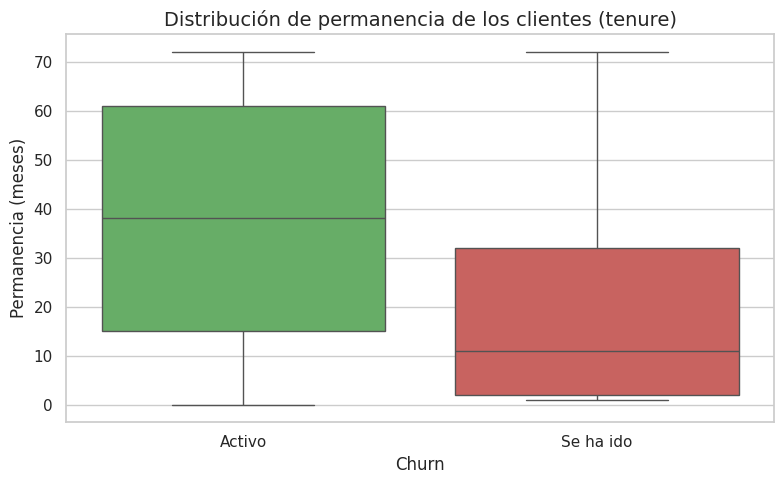

In [ ]:
# gráfico boxplot de la distribución de permanencia

datos_abiertos['Churn_str'] = datos_abiertos['Churn'].map({0: 'Activo', 1: 'Se ha ido'})

plt.figure(figsize = (8,5))
sns.boxplot(
    data = datos_abiertos,
    x = 'Churn_str',
    y = 'tenure',
    hue = 'Churn_str',
    palette = ['#5cb85c', '#d9534f'],
    legend = False
)

plt.title('Distribución de permanencia de los clientes (tenure)', fontsize = 14)
plt.xlabel('Churn')
plt.ylabel('Permanencia (meses)')
plt.tight_layout()
plt.show()

Podemos ver que los clientes que se van tienen un corto tiempo de permanencia en la empresa. Esto podría revelar que la experiencia de los clientes (contratación, atención, expectativas, uso del servicio) podría estar teniendo un gran impacto en la fidelidad.

---
---

#📄Informe final

# **Informe de análisis de Churn de clientes de Telecom X**

 - **Introducción**

 Como analista de datos en Telecom X, el propósito central de este estudio es desentrañar a fondo el fenómeno del abandono de clientes. La compañía se encuentra actualmente ante un elevado volumen de cancelaciones de servicios, lo que repercute negativamente en su crecimiento y en sus ingresos. Para enfrentar este problema, es esencial descubrir qué factores están motivando a los clientes a marcharse.

 - **Limpieza y Tratamiento de Datos**

Antes de comenzar el análisis, fue necesario acondicionar los datos para garantizar su fiabilidad y relevancia. Se partió desde un archivo en formato JSON, el cual necesitaba ser estructurado correctamente para extraer la información de manera eficiente. Para lograrlo, se descompuso en cinco conjuntos de datos separados (DataFrames), lo que permitió una revisión más detallada y específica de cada uno.


• **Normalización de Valores Categóricos**:

Se procedió a convertir las respuestas tipo 'Yes' y 'No' en distintos DataFrames a valores numéricos —específicamente 1 y 0— con el fin de simplificar el análisis estadístico.

• **Manejo de Valores Faltantes y Conversión de Tipo en 'Charges.Total'**:

La columna Charges.Total dentro del DataFrame de cuenta presentó complicaciones debido a la presencia de cadenas vacías. Aunque no se identificaron valores NaN de forma directa, estas cadenas interferían con los cálculos numéricos. Para corregirlo, se reemplazaron con ceros y se modificó el tipo de dato a numérico.

• **Creación de Nuevas Variables**:

Se incorporó una columna adicional llamada cuentas_diarias, cuyo cálculo se realizó dividiendo Charges.Monthly por 30 días. Esta variable ofrece una visión más detallada del gasto promedio por día que realiza cada cliente.

 - **Análisis Exploratorio de Datos (EDA)**

El proceso de análisis exploratorio permitió detectar patrones relevantes y tendencias dentro de la información, facilitando una comprensión más detallada de las variables vinculadas al abandono de clientes.

En la etapa inicial del estudio se observó que, del total de usuarios registrados, 5.174 continuaron utilizando los servicios de la empresa, mientras que 2.093 optaron por cancelar su contrato. Esta tasa de deserción resulta considerable y plantea la necesidad de indagar en mayor profundidad los factores que pueden estar motivando esta decisión.


---

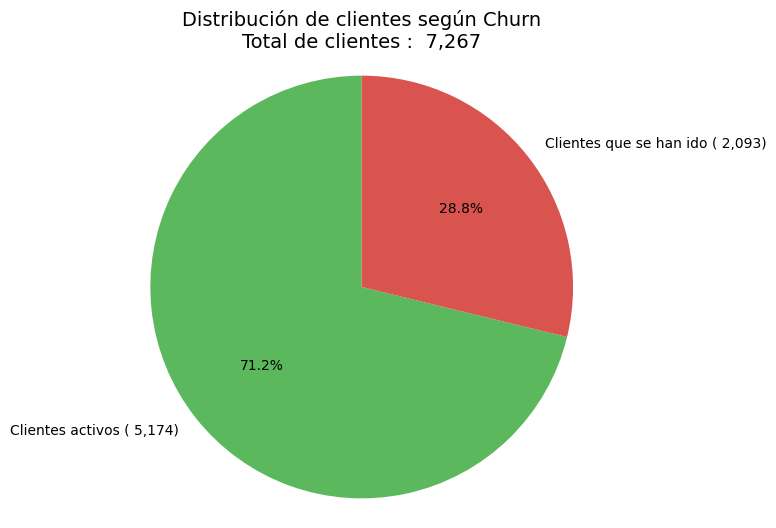

---

**Distribución de Churn por género**

Según lo que se aprecia en el gráfico, el movimiento de Churn NO se ve muy distinto en cada género (Mujer u Hombre). Por tanto, no es una variable que represente mucha importancia en el análisis.

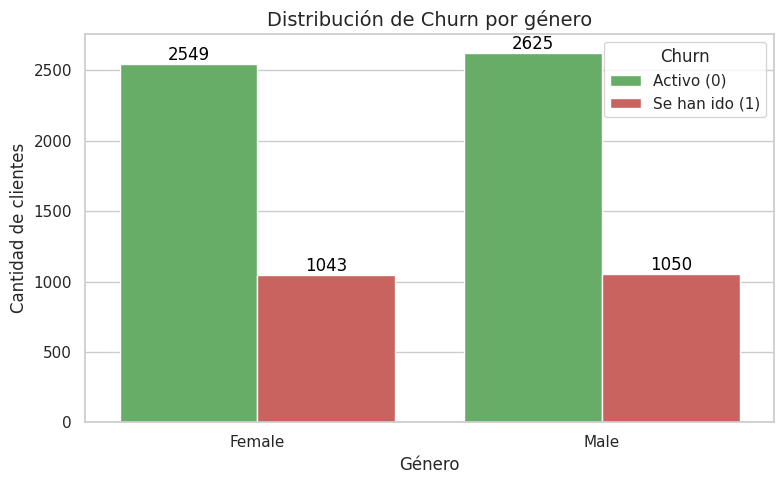

---

**Distribución de Churn por condición senior**

En este caso la variable predominante es la condición de NO senior ("0"), ya que concentran la mayor cantidad de clientes. Se presenta que la proporción de clientes No senior que permanecen es sustanciablemente mayor a los que se van.
Por otro lado la condición de SI senior("1"), representa una porción de clientes muchísima menor que los No senior, y en este caso se da que la proporción de clientes que se han ido siendo senior es notablemente mayor que los que se van siendo No senior.
Del universo de clientes No senior se han ido un 26% aporx, y en el otro segmento se da que un 44% de los clientes Si senior se han ido.

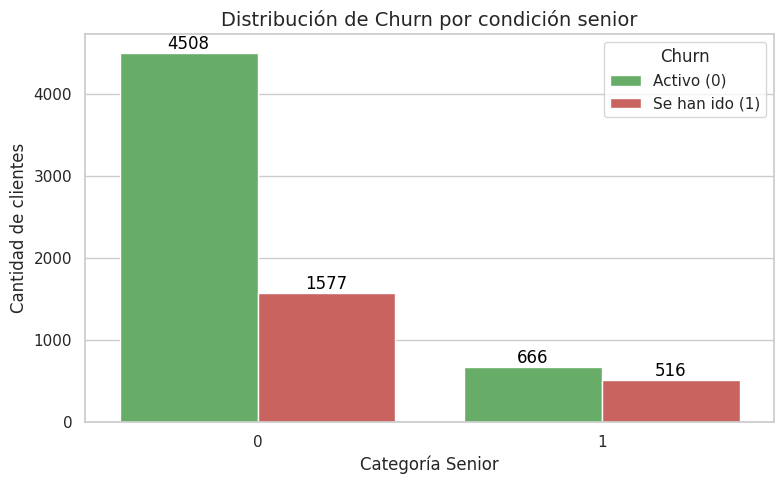

---

**Distribución de Churn por servicio de Internet**

Se aprecia que hay problemas para retener clientes cuando contratan servicio de Internet por Fibra Óptica.

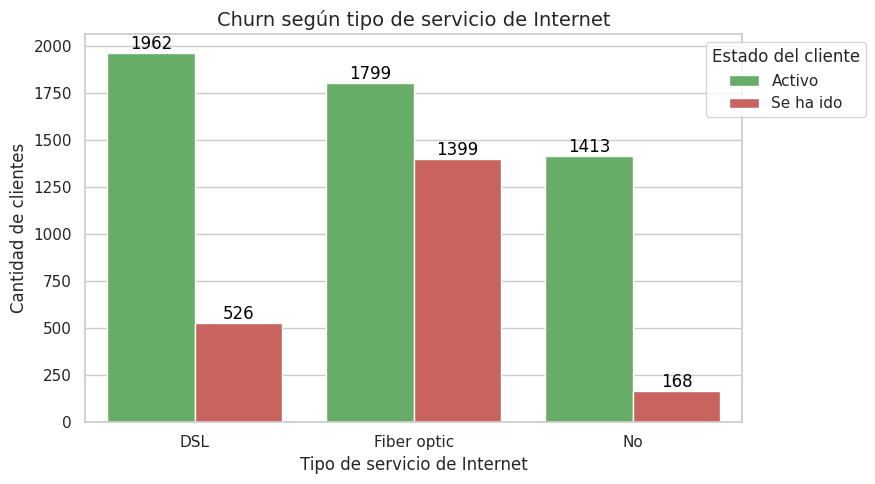

---

**Distribución de Churn por método de pago**

Hay una situación crítica con el método de pago de Cheque Electrónico, se aprecia que hay demasiada deserción en los clientes que toman esta opción de pago.

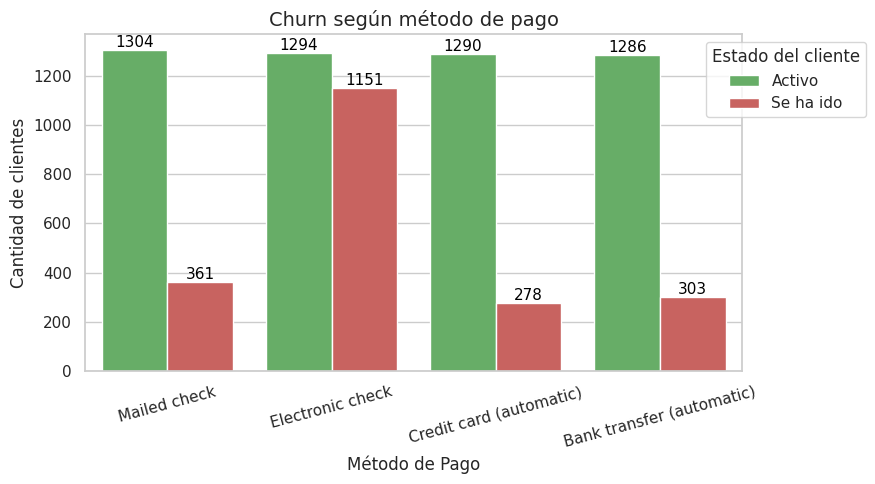

Vemos que el 78% de los contratos "Mes a Mes" adoptan la modalidad de Cheque Electrónico.

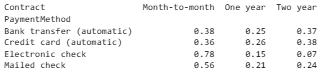

---

**Box plot de tenure**

El box plot correspondiente al _tenure_ revela que la mediana del tiempo de permanencia de los clientes que se dan de baja es muy reducida, y que todo su rango intercuartílico se sitúa dentro del primer cuartil de quienes continúan activos. Esto indica claramente que gran parte de las cancelaciones ocurre en las etapas iniciales de la relación con la compañía.


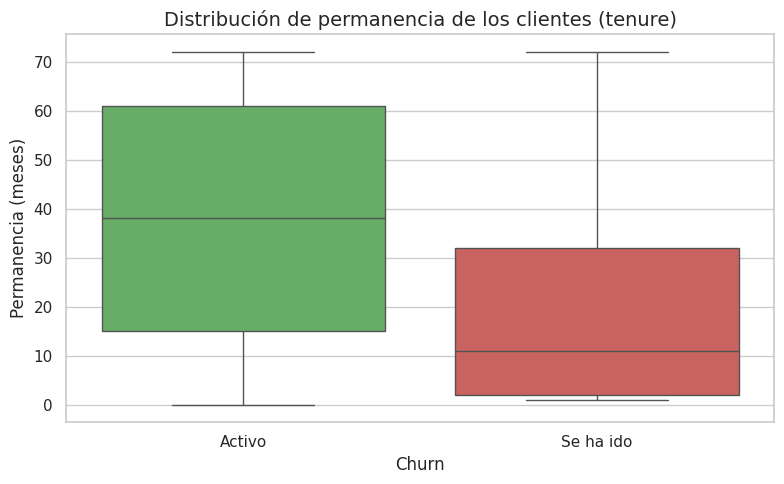

---
---

**Conclusiones e Insights**

- los clientes de **alto riesgo a que se vayan** son los con contratos mensuales, que optaron por pagar con Cheque Electrónico, son clientes NO seniors.

- La experiencia de los clientes que contrataron Internet con Fibra Óptica, es muy deficiente, considerandose una razón fuerte de deserción en este servicio.

- La forma de pago Cheque Electrónico tiene una relación muy alta con los clientes que se van, el pago con Tarjeta de Crédito presenta una mayor estabilidad en la permanencia.

- El plazo de los contratos a corto plazo tienden a tener un alto riesgo de deserción.

---
---

**Recomendaciones**

- **Contatos a corto plazo**:

 Analizar las condiciones vigentes de los contratos de corta duración para identificar y ajustar aquellos elementos que puedan estar desincentivando la permanencia de los clientes. Se recomienda diseñar beneficios adicionales o condiciones más atractivas que motiven tanto a renovar como a migrar hacia contratos de mayor plazo.

- **Calidad del servicio de Fibra Óptica**:

 Evaluar posibles deficiencias en el servicio de Internet por Fibra Óptica, considerando que su rendimiento puede verse afectado por daños físicos en el tendido, especialmente cuando este no es subterráneo. Incidentes como cortes intencionales o accidentes pueden provocar interrupciones prolongadas e intermitencia, lo que impacta directamente en la experiencia del cliente. Se sugiere analizar la viabilidad de reforzar la infraestructura, priorizando el tendido subterráneo en zonas críticas.

-  **Médoto de pago cvon Cheque Electrónico**:

 Prestar especial atención a la relación entre el uso de cheque electrónico y la tasa de cancelación de clientes. Se recomienda investigar las causas de esta correlación y fomentar métodos de pago más estables y convenientes, como tarjetas de crédito o débito, acompañados de incentivos —descuentos, bonificaciones o beneficios exclusivos— para impulsar su adopción.

---
---